In [2]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocessing

In [3]:
df_records = pd.read_csv('patient_records.csv')
df_notes = pd.read_csv('doctor_notes.csv')

In [4]:
df_original = pd.read_csv('patient_records.csv')
df_original.head()

,Unnamed: 0,Patient ID,Surgery Type,Age,Gender,Days since last visit,Outcome
0,0,1,PK,82,Male,23,Pass
1,1,2,PK,46,Female,157,Fail
2,2,3,DALK,30,Male,27,Pass
3,3,4,THPK,78,Male,180,Pass
4,4,5,PK,40,Male,222,Not determined


In [5]:
df_records.head()

,Unnamed: 0,Patient ID,Surgery Type,Age,Gender,Days since last visit,Outcome
0,0,1,PK,82,Male,23,Pass
1,1,2,PK,46,Female,157,Fail
2,2,3,DALK,30,Male,27,Pass
3,3,4,THPK,78,Male,180,Pass
4,4,5,PK,40,Male,222,Not determined


In [6]:
df_notes.head()

,Unnamed: 0,Patient ID,Doctor Notes
0,0,1,"Necessary for this condition, Penetrative Kera..."
1,1,2,Penetrative Keratoplastie was the decided proc...
2,2,3,Deep Anterior Lamellar Keratoplasty was perfor...
3,3,4,The application of THPK provided essential tec...
4,4,5,"Proving effective, the chioce of Penetrative K..."


In [7]:
df_notes.drop(columns=['Unnamed: 0'], inplace=True) 
df_records.drop(columns=['Unnamed: 0'], inplace=True) #dropping the unnamed column from both dataframes


In [8]:
df_records.info() #Checking for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient ID             500 non-null    int64 
 1   Surgery Type           500 non-null    object
 2   Age                    500 non-null    int64 
 3   Gender                 500 non-null    object
 4   Days since last visit  500 non-null    int64 
 5   Outcome                500 non-null    object
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


In [9]:
df_records.describe() #checking for statistical summary of the data

,Patient ID,Age,Days since last visit
count,500.000000,500.000000,500.000000
mean,250.500000,53.456000,177.404000
std,144.481833,26.338784,103.517557
min,1.000000,7.000000,0.000000
25%,125.750000,32.000000,91.000000
50%,250.500000,53.500000,179.000000
75%,375.250000,76.000000,267.500000
max,500.000000,99.000000,362.000000


In [10]:
df_records = pd.concat([df_records, df_notes['Doctor Notes']], axis=1)
df_records.head() #merging the two dataframes

,Patient ID,Surgery Type,Age,Gender,Days since last visit,Outcome,Doctor Notes
0,1,PK,82,Male,23,Pass,"Necessary for this condition, Penetrative Kera..."
1,2,PK,46,Female,157,Fail,Penetrative Keratoplastie was the decided proc...
2,3,DALK,30,Male,27,Pass,Deep Anterior Lamellar Keratoplasty was perfor...
3,4,THPK,78,Male,180,Pass,The application of THPK provided essential tec...
4,5,PK,40,Male,222,Not determined,"Proving effective, the chioce of Penetrative K..."


In [11]:
df_records.set_index('Patient ID', inplace=True) #setting the patient ID as the index

In [12]:
surgery_type_count = df_records['Surgery Type'].value_counts()
print(surgery_type_count) #counting the number of surgeries performed for each surgery type

Surgery Type
EK      138
PK      133
DALK    116
THPK    113
Name: count, dtype: int64


The dataset is almost evenly distributed between all the surgery types which is an ideal outcome

In [13]:
df_records['Gender']=df_records['Gender'].map({'Male': 1, 'Female': 0}) #mapping to convert categorical feature to numerical

In [14]:
df = pd.get_dummies(df_records, columns=['Surgery Type'])
df.head()
#Converted the categorical features to numerical using one hot encoding so that linear models can be applied

,Age,Gender,Days since last visit,Outcome,Doctor Notes,Surgery Type_DALK,Surgery Type_EK,Surgery Type_PK,Surgery Type_THPK
Patient ID,,,,,,,,,
1,82,1,23,Pass,"Necessary for this condition, Penetrative Kera...",False,False,True,False
2,46,0,157,Fail,Penetrative Keratoplastie was the decided proc...,False,False,True,False
3,30,1,27,Pass,Deep Anterior Lamellar Keratoplasty was perfor...,True,False,False,False
4,78,1,180,Pass,The application of THPK provided essential tec...,False,False,False,True
5,40,1,222,Not determined,"Proving effective, the chioce of Penetrative K...",False,False,True,False


In [15]:
df2 = df[['Doctor Notes', 'Surgery Type_DALK', 'Surgery Type_EK', 'Surgery Type_PK', 'Surgery Type_THPK']].copy()
df2.head()
#Creating a new dataframe for Doctor notes and surgery types to build a model that can classify doctor's notes to the surgery type

,Doctor Notes,Surgery Type_DALK,Surgery Type_EK,Surgery Type_PK,Surgery Type_THPK
Patient ID,,,,,
1,"Necessary for this condition, Penetrative Kera...",False,False,True,False
2,Penetrative Keratoplastie was the decided proc...,False,False,True,False
3,Deep Anterior Lamellar Keratoplasty was perfor...,True,False,False,False
4,The application of THPK provided essential tec...,False,False,False,True
5,"Proving effective, the chioce of Penetrative K...",False,False,True,False


In [16]:
df.drop(columns=['Doctor Notes'], inplace=True)
#Dropping the doctor notes column from the main dataframe used for model development for prediction of surgery outcome

In [17]:
df.replace('Not determined', np.nan, inplace=True)
df['Outcome'].unique()
#Replacing the undetermined values with nan values for further imputation assuming not determined is not part of prediction


array(['Pass', 'Fail', nan], dtype=object)

In [18]:
df['Outcome']=df['Outcome'].map({'Pass': 1, 'Fail': 0})
df.head()
#Mapping the outcome to numerical values for prediction

,Age,Gender,Days since last visit,Outcome,Surgery Type_DALK,Surgery Type_EK,Surgery Type_PK,Surgery Type_THPK
Patient ID,,,,,,,,
1,82,1,23,1.0,False,False,True,False
2,46,0,157,0.0,False,False,True,False
3,30,1,27,1.0,True,False,False,False
4,78,1,180,1.0,False,False,False,True
5,40,1,222,NaN,False,False,True,False


In [19]:
# df['Outcome'].fillna(df['Outcome'].mode(), inplace=True)

In [20]:
# from sklearn.impute import KNNImputer

# # Initialize the KNNImputer with a specified number of neighbors
# knn_imputer = KNNImputer(n_neighbors=5)

# # Separate features and the target column
# features = df.drop(columns=['Outcome'])
# target = df[['Outcome']]

# # Perform imputation only on the features (excluding the target column)
# features_imputed = knn_imputer.fit_transform(features)

# # Create a DataFrame from the imputed features
# features_imputed_df = pd.DataFrame(features_imputed, columns=features.columns, index=features.index)

# # Combine the imputed features with the original target column
# df_imputed = pd.concat([features_imputed_df, target], axis=1)

# # Impute missing values in the Outcome column using KNNImputer
# outcome_imputer = KNNImputer(n_neighbors=5)
# outcome_imputed = outcome_imputer.fit_transform(df_imputed[['Outcome']])

# # Update the Outcome column with imputed values
# df_imputed['Outcome'] = outcome_imputed

# # Check the imputed DataFrame
# df_imputed.head()


In [21]:
# df_imputed['Outcome'] = df_imputed['Outcome'].apply(lambda x: 1 if x > 0.5 else 0)
# df_imputed.head()



In [22]:
#After experimentation it is concluded that dropping the undetermined values from the dataset enhance the accuracy more than imputation methods
df.dropna(inplace=True)

## Insights Generation

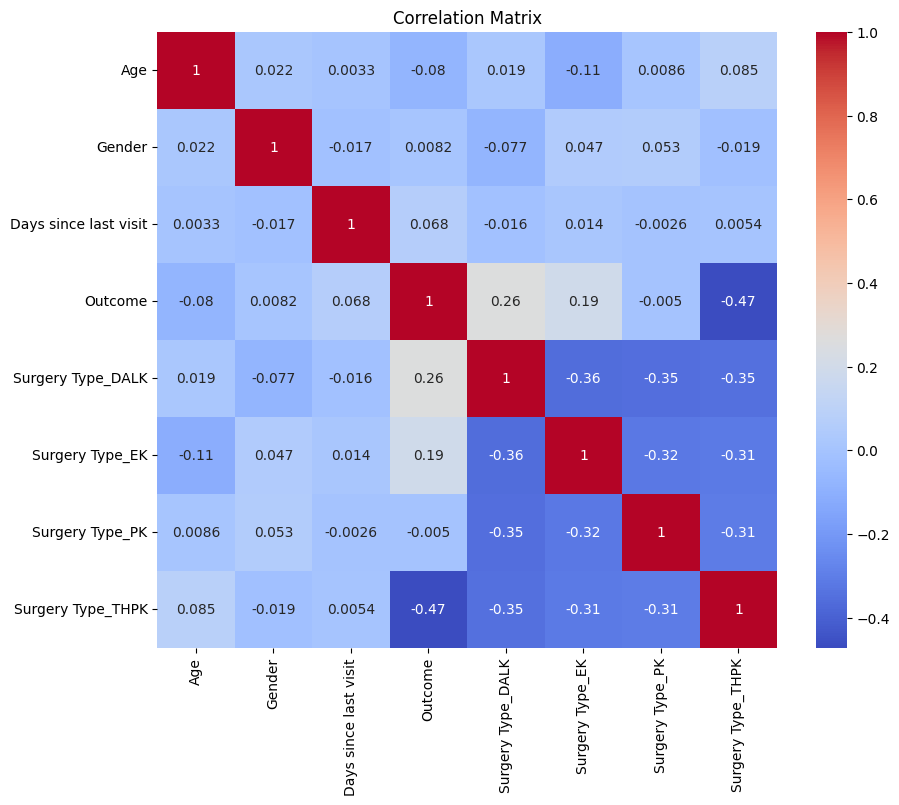

In [23]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Here are some insights we can derive from the above correlation plot
1) The strongest positive correlation (0.41) is between Surgery Type THPK and Outcome_Fail, suggesting this surgery may have a higher failure rate.
2) Outcome_Pass is strongly negatively correlated with Outcome_Fail (-0.59) and Outcome_Not determined (-0.60), as expected for mutually exclusive outcomes.
3) Age and gender have very weak correlations with other variables, indicating they may not be strong predictors of outcomes or surgery types.
4) Days since last visit has weak correlations with all variables, suggesting it may not be a significant factor.
5) Surgery Type DALK shows a moderate positive correlation (0.34) with Outcome_Pass, potentially indicating better success rates for this procedure.
6) Surgery Type EK has a weak positive correlation (0.13) with Outcome_Not determined, which might warrant further investigation.
7) Outcome_Fail and Surgery Type THPK have a moderate negative correlation (-0.32) with Outcome_Pass, reinforcing the relationship between these variables.


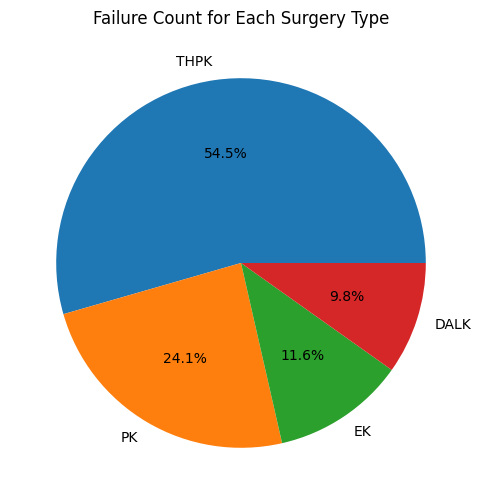

In [24]:
# Filter the dataframe to include only the failed surgeries
failed_surgeries = df_records[df_records['Outcome'] == 'Fail']

# Count the number of failed surgeries for each surgery type
failure_count = failed_surgeries['Surgery Type'].value_counts()

# Plot a pie chart for each surgery and their failure count
failure_count.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Failure Count for Each Surgery Type')
plt.ylabel('')
plt.show()

1) THPK Dominates Failure Cases: The majority of surgery failures are associated with the THPK (Transitional Hyperopic Phakic Keratoplasty) procedure, accounting for 54.5% of all failures. This indicates a potentially higher risk or complication rate for this type of surgery compared to others.

2) PK and EK Surgeries: Penetrating Keratoplasty (PK) and Endothelial Keratoplasty (EK) also contribute significantly to the total failure count, with 24.1% and 11.6% respectively. This suggests that these surgeries, while less risky than THPK, still have notable failure rates that may warrant further investigation or improvement in technique.

3) DALK Has the Lowest Failure Rate: Deep Anterior Lamellar Keratoplasty (DALK) has the lowest proportion of failures among the surgery types listed, comprising only 9.8% of the total failures. This could imply that DALK is generally safer or more successful than the other types of surgeries in this dataset.



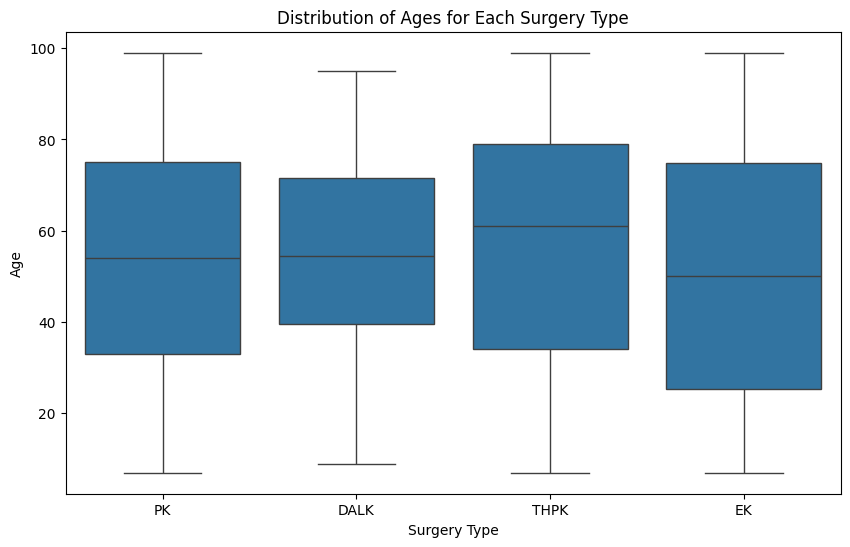

In [25]:

# Create a boxplot to visualize the distribution of ages for each surgery type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Surgery Type', y='Age', data=df_records)
plt.title('Distribution of Ages for Each Surgery Type')
plt.xlabel('Surgery Type')
plt.ylabel('Age')
plt.show()

### From the above box and whiskers plot we can derive the following conclusions

1) THPK has the highest median age, while EK has the lowest median age among all surgery types.
2) All surgery types show a wide age range, from under 20 to nearly 100 years old, indicating these procedures are performed across a broad spectrum of age groups.
3) EK demonstrates the largest interquartile range, suggesting more variability in patient ages for this surgery type.
4) DALK has the smallest interquartile range, indicating more consistency in patient ages for this procedure.
5) There is substantial overlap in age ranges across all surgery types, suggesting that age alone may not be the determining factor in surgery selection.
6) THPK appears slightly skewed towards older ages, while EK shows a more symmetric distribution of patient ages.



In [26]:
import scipy.stats as stats

# List of features to perform chi-square test
features = ['Age', 'Gender', 'Days since last visit', 'Surgery Type']

# Perform chi-square test for each feature
for feature in features:
    contingency_table = pd.crosstab(df_original[feature], df_original['Outcome'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()

Chi-square test for Age:
Chi-square statistic: 186.88143923431534
P-value: 0.38648994547470944

Chi-square test for Gender:
Chi-square statistic: 0.042566005505615394
P-value: 0.9789418821162827

Chi-square test for Days since last visit:
Chi-square statistic: 567.4268690380416
P-value: 0.20015959723942237

Chi-square test for Surgery Type:
Chi-square statistic: 132.39789385096026
P-value: 4.01748020041296e-26



1) Among the variables tested, only the surgery type shows a significant association with the outcomes.
2) The choice of surgery type is likely the most critical factor in determining outcomes, warranting further investigation into which specific types are associated with better or worse results.
3) These findings suggest that personalized treatment plans should focus more on selecting the appropriate surgery type rather than being overly concerned with patient age, gender, or follow-up scheduling.

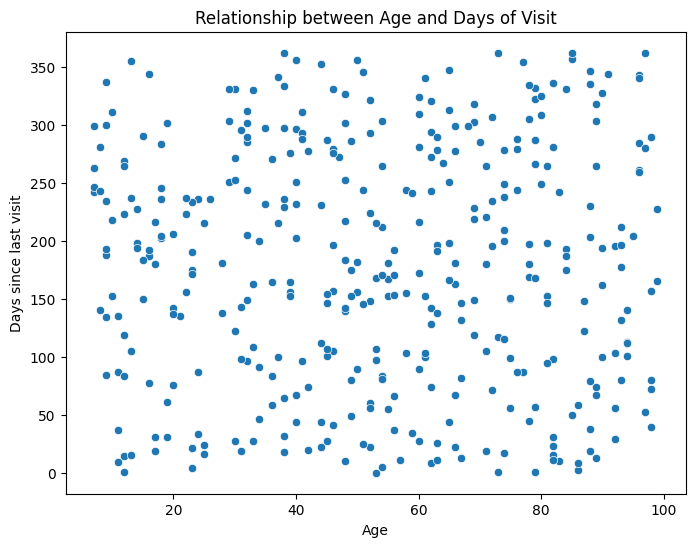

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a scatter plot to visualize the relationship between age and days of visit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Days since last visit')
plt.title('Relationship between Age and Days of Visit')
plt.xlabel('Age')
plt.ylabel('Days since last visit')
plt.show()

There doesn't appear to be a strong linear relationship between age and days since last visit. The points are scattered without a clear upward or downward trend. So we can conclude there is no linear relationship between ages and days since visit

## Summary

1) THPK Dominates Failure Cases: THPK accounts for 54.5% of all surgery failures, indicating a higher risk.
2) PK and EK Failures: PK and EK contribute 24.1% and 11.6% to the total failure count, respectively, suggesting notable failure rates.
3) DALK Success: DALK has the lowest failure rate at 9.8%, implying it is generally safer than other surgeries.
4) THPK and Failures: There is a strong positive correlation (0.41) between THPK and Outcome_Fail, reinforcing the higher failure rate of THPK.
5) Outcome Relationships: Outcome_Pass is strongly negatively correlated with Outcome_Fail (-0.59) and Outcome_Not determined (-0.60), as expected for mutually exclusive outcomes.
6) Weak Predictors: Age and Gender show very weak correlations with other variables, indicating they are not strong predictors of surgery outcomes.
7) Days Since Last Visit: Days since last visit has weak correlations with all variables, suggesting it is not a significant factor in surgery outcomes.

## Model Development

In [28]:
#Importing libraries necessary for model development
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import joblib


In [29]:
#Seperating the target and features
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [30]:
#Performing train test split on the data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Removed the scaling block as the best accuracy model is a tree based model and scaling does not impact its accuracy
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the features in X_train
X_train_normalized = scaler.fit_transform(X_train)

# Normalize the features in X_test
X_test_normalized = scaler.transform(X_test)

In [32]:



# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}

# Define parameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

# Perform grid search and print accuracy report for each classifier
for name, clf in classifiers.items():
    print(f"Training and tuning {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


Training and tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Accuracy for Random Forest: 0.7949
              precision    recall  f1-score   support

         0.0       0.45      0.64      0.53        14
         1.0       0.91      0.83      0.87        64

    accuracy                           0.79        78
   macro avg       0.68      0.74      0.70        78
weighted avg       0.83      0.79      0.81        78

------------------------------------------------------------
Training and tuning SVM...
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for SVM: 0.8077
              precision    recall  f1-score   support

         0.0       0.47      0.57      0.52        14
         1.0       0.90      0.86      0.88        64

    accuracy                           0.81        78
   macro avg       0.69      0.72      0.70        78
weighted avg       0.82      0.81      0.81        78

-------------

c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

Best Parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy for AdaBoost: 0.8077
              precision    recall  f1-score   support

         0.0       0.47      0.57      0.52        14
         1.0       0.90      0.86      0.88        64

    accuracy                           0.81        78
   macro avg       0.69      0.72      0.70        78
weighted avg       0.82      0.81      0.81        78

------------------------------------------------------------
Training and tuning Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy for Gradient Boosting: 0.8205
              precision    recall  f1-score   support

         0.0       0.50      0.57      0.53        14
         1.0       0.90      0.88      0.89        64

    accuracy                           0.82        78
   macro avg       0.70      0.72      0.71        78
weighted avg       0.83      0.82      0.83        78

-

c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Accuracy for Logistic Regression: 0.8077
              precision    recall  f1-score   support

         0.0       0.47      0.57      0.52        14
         1.0       0.90      0.86      0.88        64

    accuracy                           0.81        78
   macro avg       0.69      0.72      0.70        78
weighted avg       0.82      0.81      0.81        78

------------------------------------------------------------
Training and tuning Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Accuracy for Decision Tree: 0.7051
              precision    recall  f1-score   support

         0.0       0.32      0.57      0.41        14
         1.0       0.89      0.73      0.80        64

    accuracy                           0.71        78
   macro avg       0.60      0.65      0.61        78
weighted avg       0.79      0.71      0.73        78

----------------------

In [33]:

# Save the model
joblib.dump(best_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

## Model Building Procedure

##### 1. Importing Libraries
We start by importing necessary libraries such as scikit-learn for machine learning tasks and joblib for saving models.

##### 2. Data Preparation
The target variable 'Outcome' is separated from the features. The data is then split into training and testing sets using an 80-20 split.

##### 3. Feature Scaling
Although scaling is not critical for tree-based models, features are standardized using StandardScaler for non-tree-based models to ensure consistent performance.

##### 4. Model Initialization
We initialize several classifiers: Random Forest, SVM, AdaBoost, Gradient Boosting, Logistic Regression, and Decision Tree.

##### 5. Parameter Tuning
For each classifier, we define a grid of hyperparameters and perform Grid Search with cross-validation to find the best parameter combination. This ensures optimal model performance.

##### 6. Model Training and Evaluation
Each classifier is trained on the training set with the best parameters from the Grid Search. The models are then evaluated on the test set, and performance metrics such as accuracy and classification report are recorded.

##### 7. Model Saving
The best-performing model is saved using joblib for future use. In this case, the Gradient Boosting model was saved as it showed the best performance during evaluation.

### Develop a model for doctor notes
Although after analysing the historical data we can conclude that if a surgery type's name is mentioned in a doctor's note the datapoint will be classified for the same surgert type, we will develop a BiLSTM model so that we can try and predict the Surgery type from the doctor note in case the surgery type is not mentioned, making the prediction model more robust  

In [34]:
# Importing necessary libraries for model training
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping
import gensim

In [35]:
df2.head()

,Doctor Notes,Surgery Type_DALK,Surgery Type_EK,Surgery Type_PK,Surgery Type_THPK
Patient ID,,,,,
1,"Necessary for this condition, Penetrative Kera...",False,False,True,False
2,Penetrative Keratoplastie was the decided proc...,False,False,True,False
3,Deep Anterior Lamellar Keratoplasty was perfor...,True,False,False,False
4,The application of THPK provided essential tec...,False,False,False,True
5,"Proving effective, the chioce of Penetrative K...",False,False,True,False


In [36]:
import re
import string

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    
    return text

# Apply the preprocessing function to the Doctor Notes column
df2['Doctor Notes'] = df2['Doctor Notes'].apply(preprocess_text)

In [37]:
df2.head()

,Doctor Notes,Surgery Type_DALK,Surgery Type_EK,Surgery Type_PK,Surgery Type_THPK
Patient ID,,,,,
1,necessary for this condition penetrative kerat...,False,False,True,False
2,penetrative keratoplastie was the decided proc...,False,False,True,False
3,deep anterior lamellar keratoplasty was perfor...,True,False,False,False
4,the application of thpk provided essential tec...,False,False,False,True
5,proving effective the chioce of penetrative ke...,False,False,True,False


In [38]:

# Create a list of token lists for Word2Vec
sentences = df2['Doctor Notes'].tolist()  # Use preprocessed notes directly

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Create word-to-index mapping
word_index = {word: i + 1 for i, word in enumerate(word2vec_model.wv.index_to_key)}


In [39]:
# Convert sentences to sequences of indices
def text_to_sequence(tokens, word_index):
    return [word_index.get(token, 0) for token in tokens]

df2['sequences'] = df2['Doctor Notes'].apply(lambda x: text_to_sequence(x, word_index))

In [40]:
from gensim.models import Word2Vec

# Assuming your model is named `word2vec_model`
word2vec_model.wv.save_word2vec_format('word2vec_model.bin', binary=True)


In [41]:
# Check sequence lengths and pad sequences to ensure uniform input size
max_sequence_length = max(df2['sequences'].apply(len))
X = pad_sequences(df2['sequences'].tolist(), maxlen=max_sequence_length, padding='post', truncating='post')

# Prepare target matrix
y = df2.drop(columns=['Doctor Notes', 'Doctor Notes', 'sequences'])

# Ensure target matrix is numeric
y = y.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:


# Define BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))  # Multi-label classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels




c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.2989 - loss: 0.6598 - val_accuracy: 0.2250 - val_loss: 0.5644
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.2687 - loss: 0.5711 - val_accuracy: 0.2375 - val_loss: 0.5546
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3347 - loss: 0.5506 - val_accuracy: 0.4125 - val_loss: 0.5376
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4029 - loss: 0.5366 - val_accuracy: 0.5250 - val_loss: 0.5151
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4261 - loss: 0.5141 - val_accuracy: 0.6125 - val_loss: 0.4810
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5692 - loss: 0.4755 - val_accuracy: 0.7000 - val_loss: 0.4123
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6265 - loss: 0.4043 - val_accuracy: 0.6500 - val_loss: 0.3606
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6104 - loss: 0.3809 - val_accuracy: 0.7125 - 

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step WARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002A1248E4EA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


In [47]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9415 - loss: 0.1169
Accuracy: 0.9500


In [48]:
model.save('bilstm_model.h5')

### Model Building Procedure for BiLSTM Model

1. **Importing Libraries**
   - Essential libraries for text processing and model building are imported, including Gensim for Word2Vec and TensorFlow Keras for neural network operations.

2. **Text Preprocessing**
   - The 'Doctor Notes' text is standardized by converting to lowercase, removing punctuation, numbers, and extra whitespace.

3. **Word Embeddings**
   - A Word2Vec model is trained on the preprocessed text to create word embeddings. A word-to-index mapping is generated to convert words to indices.

4. **Sequence Preparation**
   - Text data is transformed into sequences of indices and padded to ensure uniform input size for the BiLSTM model.

5. **Target Preparation**
   - The target variables are converted to numeric form, handling any missing values, to prepare for multi-label classification.

6. **Model Definition and Training**
   - A BiLSTM model is built with an embedding layer, a bidirectional LSTM layer, and dense layers. The model is trained with early stopping to prevent overfitting.

7. **Evaluation and Saving**
   - The model's performance is evaluated on the test set, and the trained model is saved for future use.

## Summary

This project aims to create a user-friendly dashboard that helps predict the outcomes of surgical procedures based on patient data and doctor notes. By using a Bidirectional LSTM model, the system first interprets and classifies the doctor’s notes to identify the type of surgery. Next, a Gradient Boosting model analyzes patient details to estimate the likelihood of a successful or failed outcome.

The result is an intuitive Streamlit dashboard that offers real-time predictions and valuable insights, supporting healthcare professionals in making informed decisions. This tool combines sophisticated text analysis with predictive modeling, making it easier to assess surgical risks and outcomes effectively.
